### Importing the Necessary Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date, datetime
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
plt.style.use('default')



### Importing Data set from csv

In [2]:
health_df = pd.read_csv(r'C:\Users\eyinl\OneDrive\Project_files\health.csv')

### Data Profiling

In [39]:
health_df.head(10)

,ids,dob,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age,AgeGroup,sex
0,0,10/05/1950,2,168,62.0,110,80,1,0,72,3,Male
1,1,19/05/1955,1,156,85.0,140,90,3,0,67,2,Female
2,2,17/08/1951,1,165,64.0,130,70,3,0,71,3,Female
3,3,31/03/1948,2,169,82.0,150,100,1,0,74,3,Male
4,4,03/11/1947,1,156,56.0,100,60,1,0,76,4,Female
5,8,30/12/1959,1,151,67.0,120,80,2,0,64,1,Female
6,9,16/07/1960,1,157,93.0,130,80,3,0,62,1,Female
7,12,30/10/1961,2,178,95.0,130,90,3,0,62,1,Male
8,13,15/05/1948,1,158,71.0,110,70,1,0,74,3,Female
9,14,20/04/1954,1,164,68.0,110,60,1,0,68,2,Female


## Exploratory Data Analysis

#### Checking for null values

In [41]:
health_df.isna().sum()

ids            0
dob            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
age            0
AgeGroup       0
sex            0
dtype: int64

In [5]:
health_df.describe(include = 'all')

,ids,dob,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
unique,NaN,8076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,04/12/1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49972.419900,NaN,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,NaN,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,NaN,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,NaN,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,NaN,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,NaN,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000


In [6]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ids          70000 non-null  int64  
 1   dob          70000 non-null  object 
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.8+ MB


### Creating a function to return Age 

In [7]:
## Creating a function to return Age

def calculate_age (born):
    born = datetime.strptime(born, '%d/%m/%Y').date()
    today = date.today()
    age = today.year - born.year - ((born.month, born.day)<(today.month, today.day))
    return age



### Adding a new column "age" by applying the function above

In [8]:
health_df['age'] = health_df['dob'].apply(calculate_age)

In [9]:
health_df

,ids,dob,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age
0,0,10/05/1950,2,168,62.0,110,80,1,0,72
1,1,19/05/1955,1,156,85.0,140,90,3,0,67
2,2,17/08/1951,1,165,64.0,130,70,3,0,71
3,3,31/03/1948,2,169,82.0,150,100,1,0,74
4,4,03/11/1947,1,156,56.0,100,60,1,0,76
...,...,...,...,...,...,...,...,...,...,...
69995,99993,03/09/1952,2,168,76.0,120,80,1,1,70
69996,99995,16/11/1961,1,158,126.0,140,90,2,0,62
69997,99996,13/03/1952,2,183,105.0,180,90,3,0,70
69998,99998,30/05/1961,1,163,72.0,135,80,1,0,61


### Creating a new column "AgeGroup" and classifying the ages into groups

In [10]:
health_df.loc[(health_df.age.isin(range(56,61))),'AgeGroup'] = 0
health_df.loc[(health_df.age.isin(range(61,66))),'AgeGroup'] = 1
health_df.loc[(health_df.age.isin(range(66,71))),'AgeGroup'] = 2
health_df.loc[(health_df.age.isin(range(71,76))),'AgeGroup'] = 3
health_df.loc[(health_df.age.isin(range(76,81))),'AgeGroup'] = 4
health_df.loc[(health_df.age.isin(range(81,86))),'AgeGroup'] = 5
health_df.loc[(health_df.age.isin(range(86,91))),'AgeGroup'] = 6
health_df.loc[(health_df.age.isin(range(91,96))),'AgeGroup'] = 7
health_df.loc[(health_df.age.isin(range(96,101))),'AgeGroup'] = 8

In [11]:
health_df['AgeGroup'] = health_df['AgeGroup'].astype('int')

In [12]:
health_df

,ids,dob,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age,AgeGroup
0,0,10/05/1950,2,168,62.0,110,80,1,0,72,3
1,1,19/05/1955,1,156,85.0,140,90,3,0,67,2
2,2,17/08/1951,1,165,64.0,130,70,3,0,71,3
3,3,31/03/1948,2,169,82.0,150,100,1,0,74,3
4,4,03/11/1947,1,156,56.0,100,60,1,0,76,4
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,03/09/1952,2,168,76.0,120,80,1,1,70,2
69996,99995,16/11/1961,1,158,126.0,140,90,2,0,62,1
69997,99996,13/03/1952,2,183,105.0,180,90,3,0,70,2
69998,99998,30/05/1961,1,163,72.0,135,80,1,0,61,1


### Creating a copy of our dataframe with ages above 50 years old

In [13]:
new_health_df = health_df.loc[health_df['age']>50]

### Counting the total number of people above 50 years with different cholesterol levels

In [45]:
cholesterol_count = new_health_df.cholesterol.value_counts()

In [15]:
cholesterol_count

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

###  Ploting a Pie chart to examine the number of people above 50 years belonging to the three levels of Cholesterol

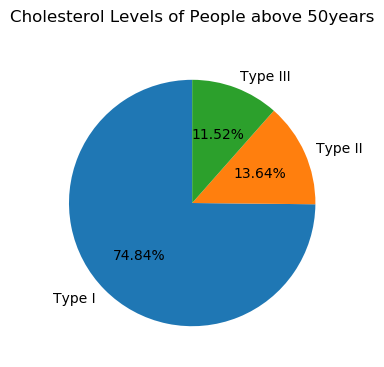

In [57]:
fig = plt.figure(figsize=(5,4))
plt.pie(cholesterol_count, labels = ['Type I', 'Type II', 'Type III'], startangle = 90, autopct='%1.2f%%')
plt.title(label="Cholesterol Levels of People above 50years", pad=20)
#plt.legend()
plt.show()

In [17]:
fig = px.pie(values=cholesterol_count, names=['Type I', 'Type II', 'Type III'], template='plotly_dark', title = 'Cholesterol Levels of People above 50years' )
fig.show()


From the chart above, about two-third of the people above 50 years of age have type I cholesterol level

In [18]:
health_df

,ids,dob,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age,AgeGroup
0,0,10/05/1950,2,168,62.0,110,80,1,0,72,3
1,1,19/05/1955,1,156,85.0,140,90,3,0,67,2
2,2,17/08/1951,1,165,64.0,130,70,3,0,71,3
3,3,31/03/1948,2,169,82.0,150,100,1,0,74,3
4,4,03/11/1947,1,156,56.0,100,60,1,0,76,4
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,03/09/1952,2,168,76.0,120,80,1,1,70,2
69996,99995,16/11/1961,1,158,126.0,140,90,2,0,62,1
69997,99996,13/03/1952,2,183,105.0,180,90,3,0,70,2
69998,99998,30/05/1961,1,163,72.0,135,80,1,0,61,1


### Converting Agegroups to List

In [19]:
list(health_df.AgeGroup.unique())

[3, 2, 4, 1, 5, 0, 7]

### Using the map function to create a new "sex" column in the dataframe

In [20]:
d = {1:'Female', 2:'Male'}

health_df['sex'] = health_df['gender'].map(d)

In [21]:
health_df

,ids,dob,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age,AgeGroup,sex
0,0,10/05/1950,2,168,62.0,110,80,1,0,72,3,Male
1,1,19/05/1955,1,156,85.0,140,90,3,0,67,2,Female
2,2,17/08/1951,1,165,64.0,130,70,3,0,71,3,Female
3,3,31/03/1948,2,169,82.0,150,100,1,0,74,3,Male
4,4,03/11/1947,1,156,56.0,100,60,1,0,76,4,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,03/09/1952,2,168,76.0,120,80,1,1,70,2,Male
69996,99995,16/11/1961,1,158,126.0,140,90,2,0,62,1,Female
69997,99996,13/03/1952,2,183,105.0,180,90,3,0,70,2,Male
69998,99998,30/05/1961,1,163,72.0,135,80,1,0,61,1,Female


### Using a lengthy for loop to group the data by AgeGroup and Finding the average weight for each Group

In [22]:
##Read more on join, it will save you this stress

##Using for loop to group the data by age group and finding the average weight of each Age group

Age_group = list(health_df.AgeGroup.unique())

average_weight = {}
for x in Age_group:
    weight = []
    for i in health_df.index:
        if health_df.loc[i, 'AgeGroup'] == x:
            weight.append(health_df.loc[i, 'weight'])
    sum_weight = sum(weight)
    mean_weight = round(sum_weight/len(weight),2)
    average_weight.update({x:mean_weight})
    
    
print(average_weight)


{3: 74.06, 2: 74.44, 4: 73.47, 1: 74.92, 5: 72.03, 0: 75.01, 7: 67.25}


### sorting the average weight of each age group

In [23]:
##sorting the average weight of each age group


my_weight_list = []
for values in average_weight.values():
    my_weight_list.append(values)
    
sorted_my_weight_list = sorted(my_weight_list)

sorted_my_weight_list


[67.25, 72.03, 73.47, 74.06, 74.44, 74.92, 75.01]

### Highest average weight

In [24]:
#highest average weight

max(sorted_my_weight_list)

75.01

### Lowest average weight

In [25]:
#lowest average weight

min(sorted_my_weight_list)

67.25

### Difference between the Group with Highest and Lowest average weight

In [26]:
#Difference between them
round(max(sorted_my_weight_list) - min(sorted_my_weight_list), 2)

7.76

### Using a lengthy for loop to group the data by Gender and Finding the average weight for each Group

In [27]:
##Read more on join, it will save you this stress

##Using for loop to group the data by gender and finding the average weight of each Age group

#gender:1 for female and 2 for male

gender = list(health_df.gender.unique())

average_weight = {}
for x in gender:
    weight = []
    for i in health_df.index:
        if health_df.loc[i, 'gender'] == x:
            weight.append(health_df.loc[i, 'weight'])
    sum_weight = sum(weight)
    mean_weight = round(sum_weight/len(weight),2)
    average_weight.update({x:mean_weight})
    
    
print(average_weight)

{2: 77.26, 1: 72.57}


### Using "groupby" to group the data by Gender and Finding the average weight for each Group 

In [28]:
avg_weight = health_df.groupby(['sex'])['weight'].mean()
avg_weight

sex
Female    72.565605
Male      77.257307
Name: weight, dtype: float64

### Creating a bar chart to examine the difference between the weight of Males and Females in the data

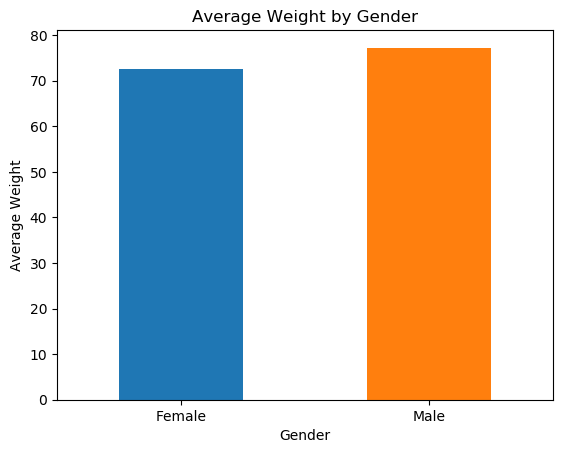

In [37]:
avg_weight.plot(kind = 'bar', stacked = False, color = ['C0', 'C1'])

plt.title('Average Weight by Gender')
#plt.suptitle('Average Weight by Gender', x = 0.5, y =0.95)
plt.xticks(rotation = 0, ha = 'center')
plt.ylabel("Average Weight")
plt.xlabel('Gender')
plt.show()

Clearly, we can observe that males generally weigh more than females

### Using a lengthy for loop to group the data by Gender and Finding the average height for each Group

In [ ]:
##Read more on join, it will save you this stress

##Using for loop to group the data by gender and finding the average height of each Age group

#gender:1 for female and 2 for male

gender = list(health_df.gender.unique())

average_height = {}
for x in gender:
    height = []
    for i in health_df.index:
        if health_df.loc[i, 'gender'] == x:
            height.append(health_df.loc[i, 'height'])
    sum_height = sum(height)
    mean_height = round(sum_height/len(height),2)
    average_height.update({x:mean_height})
    
    
print(average_height)

### Using "groupby" to group the data by Gender and Finding the average height for each Group

In [ ]:
agg_height = health_df.groupby(['gender'])['height'].mean()
agg_height

### Finding the percentage difference in the average height of Males and Females

In [ ]:
percentage_diff = (max(average_height.values()) - min(average_height.values()))/max(average_height.values()) *100

print(round(percentage_diff,2),'%')

The average height of males is 5% higher than that of the females.

In [ ]:
health_df

In [ ]:
health_df.info()

### Grouping the data by cholesterol and gender level

In [32]:
chole_by_sex = health_df.groupby(['cholesterol', 'sex'])['sex'].count().unstack()

In [33]:
chole_by_sex

sex,Female,Male
cholesterol,,
1,33570,18815
2,6403,3146
3,5557,2509


### Creating a bar chart to visualize the frequency of Cholesterol types by Gender

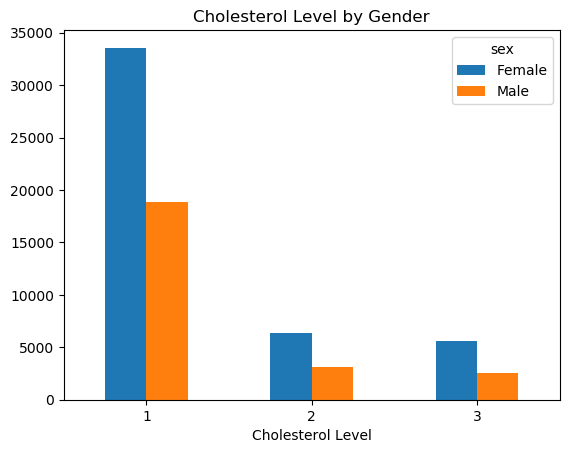

In [34]:
chole_by_sex.plot(kind = 'bar', stacked = False)

plt.title('Cholesterol Level by Gender')
plt.xticks(rotation = 0, ha = 'center')
plt.xlabel('Cholesterol Level')
plt.show()